<a href="https://colab.research.google.com/github/nabilaaaa24/data_mining/blob/main/Latihan_Modul_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code di bawah ini merupakan kerangka pengerjaan untuk clustering. Perbaiki dan lengkapi agar bisa berjalan tanpa error.

1. Import library yang dibutuhkan

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

2. Tampilkan dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Muat dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/data_pelanggan.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


3. Lakukan EDA secukupnya

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Hitung dan cetak jumlah pelanggan berdasarkan jenis kelamin
print(df['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


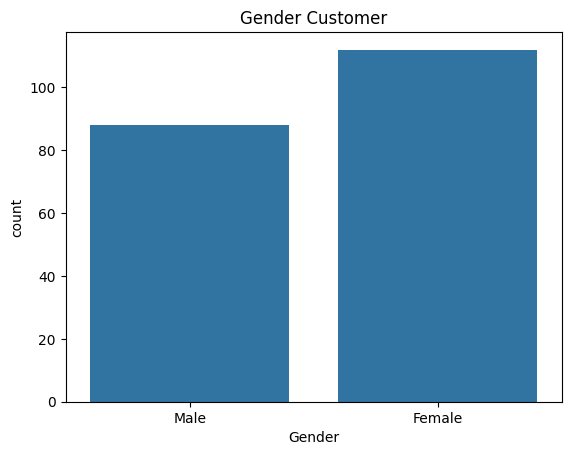

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Customer')
plt.show()

4. Buat visualisasi data

Text(0, 0.5, 'Jumlah Pelanggan')

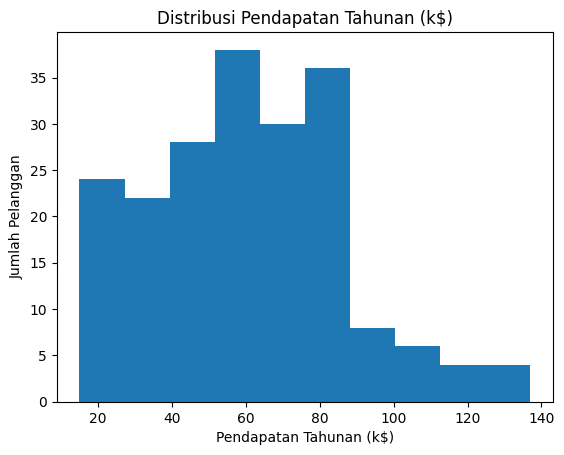

In [ ]:
# Buat histogram untuk pendapatan tahunan
plt.hist(df['Annual Income (k$)'], bins=10)
plt.title('Distribusi Pendapatan Tahunan (k$)')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Jumlah Pelanggan')

5. Preprocessing Data

In [ ]:
# Tips: Gunakan pd.get_dummies() untuk one hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'])

In [ ]:
df_encoded

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


In [ ]:
#Normalisasi Data: Usia, Pendapatan Tahunan, dan Skor Pengeluaran
scaler = MinMaxScaler()
df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [ ]:
df_encoded

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,0.019231,0.000000,0.387755,False,True
1,2,0.057692,0.000000,0.816327,False,True
2,3,0.038462,0.008197,0.051020,True,False
3,4,0.096154,0.008197,0.775510,True,False
4,5,0.250000,0.016393,0.397959,True,False
...,...,...,...,...,...,...
195,196,0.326923,0.860656,0.795918,True,False
196,197,0.519231,0.909836,0.275510,True,False
197,198,0.269231,0.909836,0.744898,False,True
198,199,0.269231,1.000000,0.173469,False,True


6. Penerapan K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

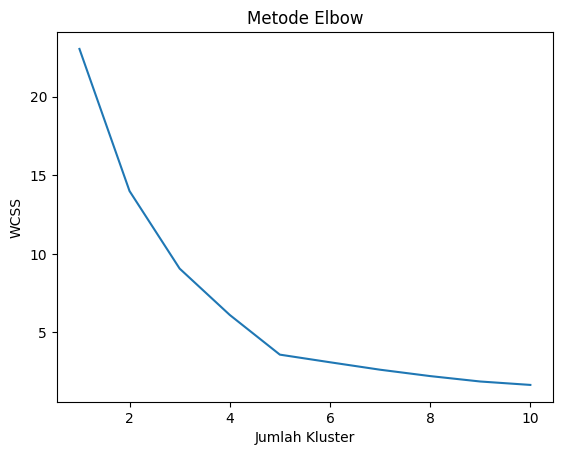

In [ ]:
# Gunakan metode Elbow untuk menentukan jumlah kluster yang ideal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Lanjutkan proses clustering

In [ ]:
# Melakukan clustering dengan jumlah kluster yang telah ditentukan
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']])

# Menambahkan kolom kluster ke dalam DataFrame
df_encoded['Cluster'] = kmeans.labels_

# Menampilkan hasil clustering
df_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,1,0.019231,0.000000,0.387755,False,True,2
1,2,0.057692,0.000000,0.816327,False,True,3
2,3,0.038462,0.008197,0.051020,True,False,2
3,4,0.096154,0.008197,0.775510,True,False,3
4,5,0.250000,0.016393,0.397959,True,False,2
...,...,...,...,...,...,...,...
195,196,0.326923,0.860656,0.795918,True,False,4
196,197,0.519231,0.909836,0.275510,True,False,1
197,198,0.269231,0.909836,0.744898,False,True,4
198,199,0.269231,1.000000,0.173469,False,True,1


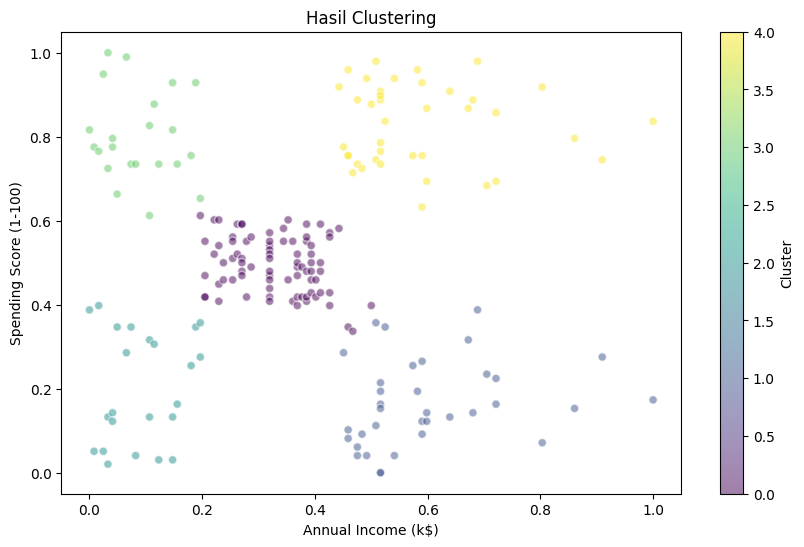

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['Annual Income (k$)'], df_encoded['Spending Score (1-100)'],
            c=df_encoded['Cluster'], cmap='viridis', alpha=0.5, edgecolors='w')
plt.title('Hasil Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

7. Interpretasi Kluster

Setelah menentukan jumlah kluster, lakukan analisis untuk memahami karakteristik dari setiap kluster

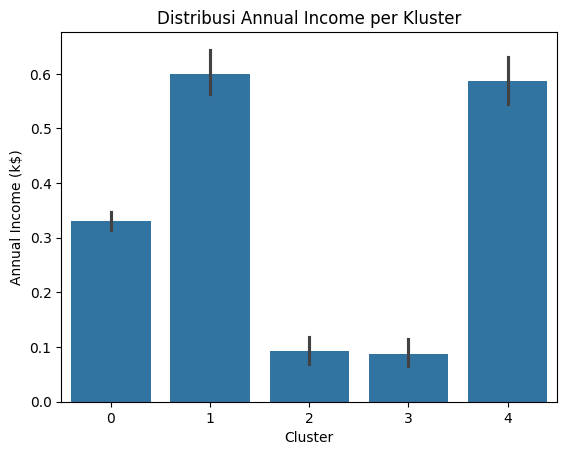

In [ ]:
# Boxplot untuk melihat distribusi Annual Income dalam setiap kluster
sns.barplot(x='Cluster', y='Annual Income (k$)', data=df_encoded)
plt.title('Distribusi Annual Income per Kluster')
plt.show()

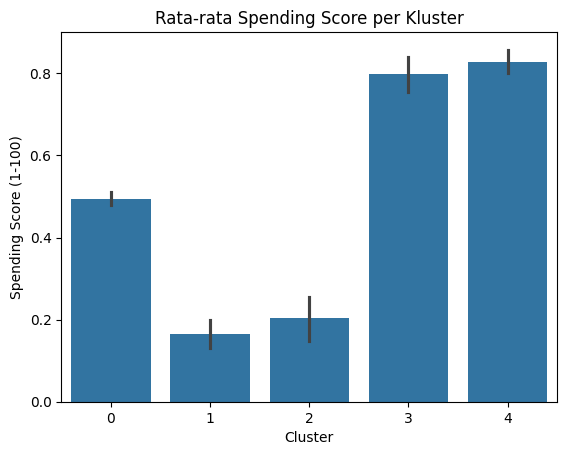

In [ ]:
# Barplot untuk melihat rata-rata Spending Score dalam setiap kluster
sns.barplot(x='Cluster', y='Spending Score (1-100)', data=df_encoded)
plt.title('Rata-rata Spending Score per Kluster')
plt.show()

1. Cluster 0 memiliki rata-rata pendapatan tahunan lebih rendah dibanding pengeluarannya
2. Cluster 1 memiliki rata-rata pendapatan tahunan tertinggi seperti dengan cluster 4, serta pengeluaran pada cluster 1 adalah yang paling sedikit
3. Cluster 2 memiliki rata-rata pendapatan tahunan terendah kedua, dan pengeluarannya juga menjadi terendah kedua setelah cluster 1
4. Cluster 3 memiliki rata-rata pendapatan tahunan terendah, namun pengeluarannya tertinggi kedua
5. Cluster 4 memiliki pendapatan dan pengeluaran tertinggi dibanding cluster lain, namun pengeluarannya lebih besar dibanding pendapatan tahunannya
